# 15. Root Finding
---
**Content:**
- [Conventional Algorithms](#Conventional-Algorithms)
- [Examples](#Examples)

see also: https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding

## The Problem
---
$$ \text{ find } x_0 \text{ so that } f(x_0) = 0$$

- closely connected to solutions of equations:

$$ f(x_0) = g(x_0) \quad \Leftrightarrow \quad f(x_0) - g(x_0) = 0$$

- and to minimizations:

$$F(x_0) \text{ is minimized if } \frac{\partial F(x)}{\partial x} = 0$$

## Conventional Algorithms

### a) Bisection Method

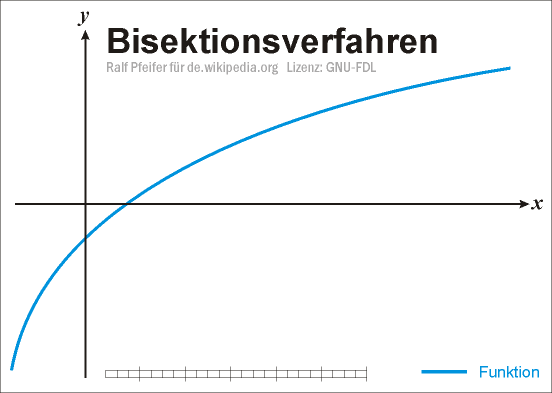

### b) Newton's Method
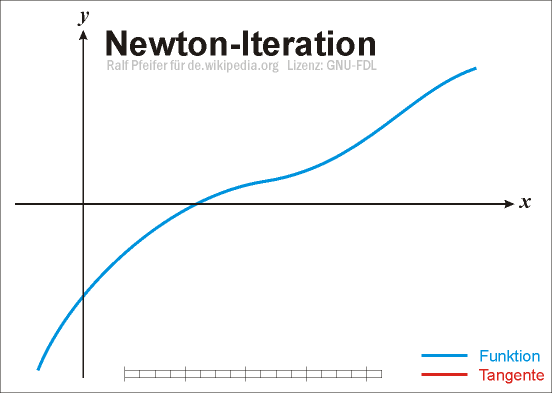

### c) Regula Falsi
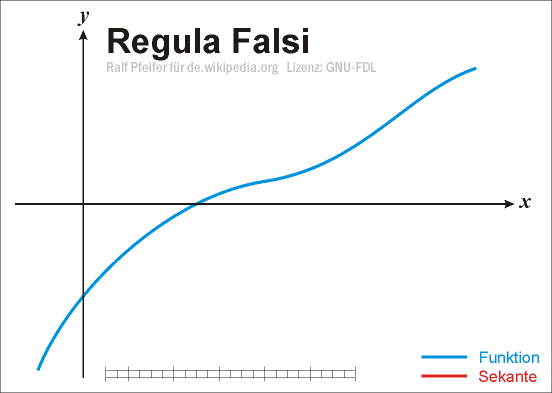

## Examples
---

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as optimize

### a) 1D Situation

$$ f(x) = e^x - x - 2= 0$$

In [ ]:
def f(x):
    return np.exp(x) - x - 2.0

plt.figure(1)
plt.grid()
x = np.linspace(-3, 2, 100)
plt.plot(x, f(x))
plt.show()

#### ... as fixed-point problem
$$ f(x) = e^x - x - 2 = 0 \quad \Leftrightarrow \quad g(x) = e^x - 2 = x$$


In [ ]:
# simple iterative solver
def g(x):
    return f(x) + x

xNext = -3.0
for i in range(0, 20):
    xNext = g(xNext)
    print(" %2d: %13.12f"%(i, xNext))
    
# how about the other root?

#### ... using Scipy's routines

In [ ]:
# using Newton's method
x0, sol = optimize.newton(func=f, x0=2, full_output=True)
print( sol )

In [ ]:
plt.figure(1)
plt.grid()
x = np.linspace(-3, 2, 100)
plt.plot(x, f(x))
plt.plot(x0, f(x0), 'o')
plt.show()

In [ ]:
# using bisection
x0, sol = optimize.bisect(f=f, a=-3, b=0, full_output=True)
print( sol )

plt.figure(1)
plt.grid()
x = np.linspace(-3, 2, 100)
plt.plot(x, np.exp(x) - x - 2)
plt.plot(x0, f(x0), 'o')
plt.show()

In [ ]:
# using Brent’s method
# ... combines root bracketing, interval bisection, 
#     and inverse quadratic interpolation.
x0, sol = optimize.brentq(f=f, a=-3, b=0, full_output=True)
print( sol )

plt.figure(1)
plt.grid()
x = np.linspace(-3, 2, 100)
plt.plot(x, np.exp(x) - x - 2)
plt.plot(x0, f(x0), 'o')
plt.show()

### b) 1D -- complex

$$f(z) = z^3 - 1 = 0 \quad \text{has three solutions:} \quad x_0 = \{1, e^{2\pi i/3}, e^{4\pi i/3} \}$$

In [ ]:
from scipy.interpolate import griddata

# define complex function
def f(z):
    return z**3.0 - 1 

# it's derivative for speeding up Newton's method
def fp(z):
    return 3.0*z**2.0

# scanning range of real (r) and imaginary (i) parts
rmin, rmax = 0.1, 0.7
imin, imax = 0.3, 1.0
r      = np.linspace(rmin, rmax, 150)
i      = np.linspace(imin, imax, 150)
solOpt = np.zeros((150**2, 3))

n = 0
for rp in r:
    for ip in i:

        sol = optimize.newton(f, rp+1j*ip, fprime=fp)
        
        solOpt[n, 0] = rp
        solOpt[n, 1] = ip
        
        if((np.abs(sol) - 1) < 10**-5):
            solOpt[n, 2] = -1
        if((np.abs(sol - np.exp(2*np.pi*1j/3))) < 10**-5):
            solOpt[n, 2] = 0
        if((np.abs(sol - np.exp(4*np.pi*1j/3))) < 10**-5):
            solOpt[n, 2] = +1
            
        n += 1
        
# plot colormap of results
xNew = np.linspace(rmin, rmax, 300)
yNew = np.linspace(imin, imax, 300)
xGrid, yGrid = np.meshgrid(xNew, yNew)
zNew = griddata((solOpt[:, 0], solOpt[:, 1]), solOpt[:, 2], (xGrid, yGrid), method='cubic')
plt.figure(1)
plt.contourf(xGrid, yGrid, zNew, levels=200, cmap="Spectral")
plt.colorbar()
plt.show()


### c) 2D Situation
$$ \text{ find } \vec{x}_0 \text{ so that } \vec{f}(\vec{x}_0) = \vec{0}$$
- availabe methods: hybr, lm, broyden1, broyden2, anderson, linearmixing, diagbroyden, excitingmixing, krylov, df-sane

In [ ]:
def f2D(x):
    return [x[0] + 0.5 * (x[0] - x[1])**3 - 1.0,
            0.5 * (x[1] - x[0])**3 + x[1]]

sol = optimize.root(fun=f2D, x0=[0, 0], method='hybr')
print( sol )
print("---------")
print("  f2D(x):", f2D(sol.x) )